In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.linspace(0,10,100000)

In [3]:
noise = np.random.randn(len(X))
noise

array([ 0.65263242,  1.10527483, -1.22819562, ..., -0.58652169,
        1.35397428,  0.27030956])

# Y = MX + C

M = 0.5 C = 1

In [4]:
Y = 0.5 * X + 1 + noise

In [5]:
Y

array([ 1.65263242,  2.10532483, -0.22809562, ...,  5.4133783 ,
        7.35392428,  6.27030956])

In [6]:
X_DF = pd.DataFrame(data=X,columns=['X_Data'])

In [7]:
Y_DF = pd.DataFrame(data=Y,columns=['Y_Data'])

In [8]:
Data = pd.concat([X_DF,Y_DF],axis=1)

In [9]:
Data.head()

,X_Data,Y_Data
0,0.0000,1.652632
1,0.0001,2.105325
2,0.0002,-0.228096
3,0.0003,2.627943
4,0.0004,0.097213


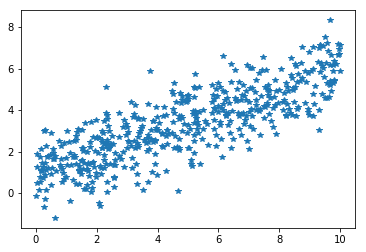

In [10]:
int1 = np.random.randint(len(X),size =500)

plt.plot(X[int1],Y[int1],'*')

In [11]:
batchsize = 10

X_Pc = tf.placeholder(tf.float32,[batchsize])
Y_Pc = tf.placeholder(tf.float32,[batchsize])

In [12]:
np.random.randn(2)

array([-0.3135858 , -1.27255965])

In [13]:
M = tf.Variable(1.34)
C = tf.Variable(-0.74)

In [14]:
Y_Hat = M * X_Pc + C

In [15]:
error = tf.reduce_sum(tf.square(Y_Hat - Y_Pc))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epoc = 10000
    
    for i in range(epoc):
        
        rand_int = np.random.randint(len(X),size=batchsize)
        f_dict = {X_Pc:X[rand_int],Y_Pc:Y[rand_int]}
        
        sess.run(train,feed_dict=f_dict)
    
    final_M,final_C = sess.run([M,C])

In [19]:
final_M

0.51759738

In [20]:
final_C

1.0393776

In [21]:
new_data = np.linspace(2,8,20)

In [22]:
new_pred = final_M * new_data + final_C

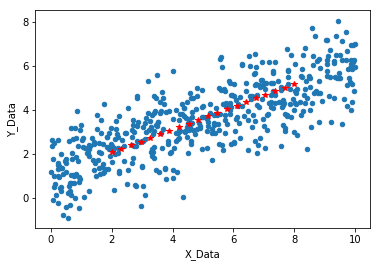

In [23]:
Data.sample(n=500).plot(kind ='scatter',x='X_Data',y='Y_Data')
plt.plot(new_data,new_pred,'r*')

# Creating Linear Regression Classfier using TF Estimator API

In [24]:
feature_cols = [tf.feature_column.numeric_column('X')]

In [25]:
estimator = tf.estimator.LinearRegressor(feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn', '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5}


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
X_train.shape

(67000,)

In [29]:
input_function = tf.estimator.inputs.numpy_input_fn({'X':X_train},y_train,batch_size=10,num_epochs=None,shuffle=True)

In [30]:
train_input_function = tf.estimator.inputs.numpy_input_fn({'X':X_train},y_train,batch_size=10,num_epochs=None,shuffle=False)

In [31]:
test_input_function = tf.estimator.inputs.numpy_input_fn({'X':X_test},y_test,batch_size=10,num_epochs=None,shuffle=False)

In [32]:
estimator.train(input_function,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn/model.ckpt.
INFO:tensorflow:loss = 217.101, step = 1
INFO:tensorflow:global_step/sec: 932.105
INFO:tensorflow:loss = 22.0994, step = 101 (0.109 sec)
INFO:tensorflow:global_step/sec: 966.156
INFO:tensorflow:loss = 14.534, step = 201 (0.104 sec)
INFO:tensorflow:global_step/sec: 978.033
INFO:tensorflow:loss = 13.9592, step = 301 (0.102 sec)
INFO:tensorflow:global_step/sec: 979.529
INFO:tensorflow:loss = 12.0067, step = 401 (0.102 sec)
INFO:tensorflow:global_step/sec: 993.492
INFO:tensorflow:loss = 7.68494, step = 501 (0.101 sec)
INFO:tensorflow:global_step/sec: 992.27
INFO:tensorflow:loss = 5.10511, step = 601 (0.101 sec)
INFO:tensorflow:global_step/sec: 979.625
INFO:tensorflow:loss = 6.61983, step = 701 (0.102 sec)
INFO:tensorflow:global_step/sec: 943.575
INFO:tensorflow:loss = 25.0691, step = 801 (0.106 sec)
INFO:tensorflow:global_step/se

In [33]:
train_acc = estimator.evaluate(train_input_function,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-01-10:53:20
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [214/1000]
INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [34]:
test_acc = estimator.evaluate(test_input_function,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-01-10:53:24
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [35]:
train_acc

{'average_loss': 1.0286713, 'global_step': 1000, 'loss': 10.286713}

In [36]:
test_acc

{'average_loss': 1.0294311, 'global_step': 1000, 'loss': 10.294311}

## Predicting New Input

In [39]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'X':np.linspace(0,10,10)},shuffle=False)

In [40]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn/model.ckpt-1000


[{'predictions': array([ 1.01123154], dtype=float32)},
 {'predictions': array([ 1.56786144], dtype=float32)},
 {'predictions': array([ 2.12449121], dtype=float32)},
 {'predictions': array([ 2.68112135], dtype=float32)},
 {'predictions': array([ 3.23775101], dtype=float32)},
 {'predictions': array([ 3.79438114], dtype=float32)},
 {'predictions': array([ 4.3510108], dtype=float32)},
 {'predictions': array([ 4.90764093], dtype=float32)},
 {'predictions': array([ 5.46427059], dtype=float32)},
 {'predictions': array([ 6.02090073], dtype=float32)}]

In [41]:
predict_list = []

for pred in list(estimator.predict(input_fn=input_fn_predict)):
    
    predict_list.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpvwksrocn/model.ckpt-1000


In [42]:
predict_list

[array([ 1.01123154], dtype=float32),
 array([ 1.56786144], dtype=float32),
 array([ 2.12449121], dtype=float32),
 array([ 2.68112135], dtype=float32),
 array([ 3.23775101], dtype=float32),
 array([ 3.79438114], dtype=float32),
 array([ 4.3510108], dtype=float32),
 array([ 4.90764093], dtype=float32),
 array([ 5.46427059], dtype=float32),
 array([ 6.02090073], dtype=float32)]

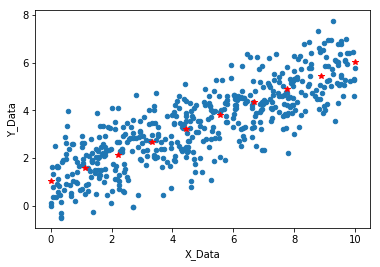

In [43]:
Data.sample(n=500).plot(kind ='scatter',x='X_Data',y='Y_Data')
plt.plot(np.linspace(0,10,10),predict_list,'r*')

# Awesome !!! 